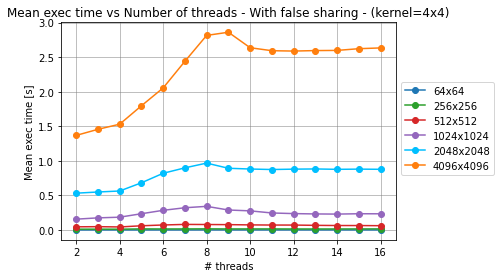

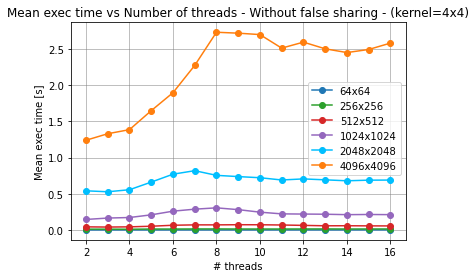

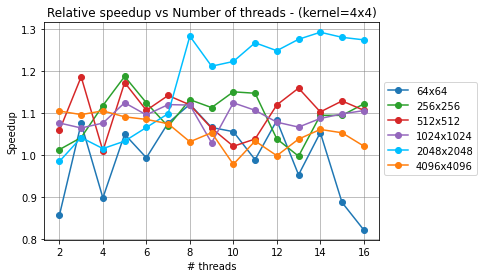

In [9]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl 
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# compute confidence interval with Student's T distribuition
# before computing anything check if RV are normal and iid
def compute_ci_student_t (data,alpha = 0.95): 
    # number of degrees of freedom of the sample
    degrees = len(data)-1
    # sample mean
    mean = np.mean(data)
    # std error = sample_std/sqrt(n)    
    sem = st.sem(data)
    return st.t.interval(alpha,degrees,mean,sem)

path_FS    = '../false_sharing/csv/false_sharing'
path_NO_FS = '../false_sharing/csv/NO_false_sharing'
image      = ['64','256','512','1024','2048','4096']
image_     = [64,256,512,1024,2048,4096]
threads    = ['2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
threads_   = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
csv_name   = 'exec_times'
colors     = ['tab:blue','tab:green','tab:red','tab:purple','deepskyblue','tab:orange','tab:olive','m','springgreen','salmon','paleturquoise','orchid','dodgerblue','yellow','turquoise','royalblue','tomato','chartreuse']

speedup    = [[],[],[],[],[],[]]

def main():

    #####################################################################################################################################################
    #                                                                  FALSE_SHARING                                                                    #
    #####################################################################################################################################################

    mean_exec_time_FS = [[],[],[],[],[],[]]

    # start 'for l in range(0,len(image_)):'
    for l in range(0,len(image_)):
        
        # start 'for r in range(0,len(threads_)):'
        for r in range(0,len(threads_)):

            # parse csv
            raw = pd.read_csv(path_FS + '/' + csv_name + '(' + str(image[l]) + 'x' + str(image[l]) + '_4x4)(' + str(threads[r]) + ').csv')

            exec_times = raw[raw.columns[1]]

            mean_exec_time_FS[l].append(np.mean(exec_times))
        # end 'for r in range(0,len(rate)):'
        
        plt.plot(threads_,mean_exec_time_FS[l],marker='o',color=colors[l],label=image[l]+'x'+image[l])
    # end 'for l in range(0,len(image_)):'
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - With false sharing - (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/FS_mean_exec_time(4x4).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                               NO FALSE_SHARING                                                                    #
    #####################################################################################################################################################

    mean_exec_time_NO_FS = [[],[],[],[],[],[]]

    # start 'for l in range(0,len(image_)):'
    for l in range(0,len(image_)):
        
        # start 'for r in range(0,len(threads_)):'
        for r in range(0,len(threads_)):

            # parse csv
            raw = pd.read_csv(path_NO_FS + '/' + csv_name + '(' + str(image[l]) + 'x' + str(image[l]) + '_4x4)(' + str(threads[r]) + ').csv')

            exec_times = raw[raw.columns[1]]

            mean_exec_time_NO_FS[l].append(np.mean(exec_times))
        # end 'for r in range(0,len(rate)):'
        
        plt.plot(threads_,mean_exec_time_NO_FS[l],marker='o',color=colors[l],label=image[l]+'x'+image[l])
    # end 'for l in range(0,len(image_)):'
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - Without false sharing - (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/NO_FS_mean_exec_time(4x4).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                                    SPEEDUP                                                                        #
    #####################################################################################################################################################

    # start 'for i in range(0,len(mean_exec_time_FS)):'
    for i in range(0,len(mean_exec_time_FS)):

        # start 'for r in range(0,len(threads_)):'
        for j in range(0,len(threads_)):

            speedup[i].append(mean_exec_time_FS[i][j] / mean_exec_time_NO_FS[i][j])

        # end 'for r in range(0,len(threads_)):'

        plt.plot(threads_,speedup[i],marker='o',color=colors[i],label=image[i]+'x'+image[i])

    # end 'for i in range(0,len(mean_exec_time_FS)):'

    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Relative speedup vs Number of threads - (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/relative_speedup(4x4).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################

    
if __name__ == '__main__':
    main()